<a href="https://colab.research.google.com/github/Cralzatec/SenalesSistemas/blob/main/Parcial_1_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parcial 1 SyS | Cristian Alzate Combita |1055753170

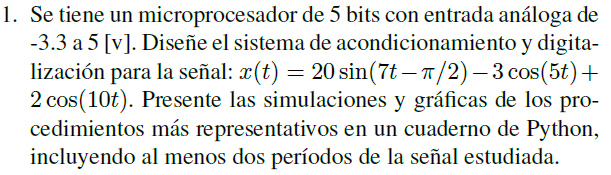

Solución:

1. Importacion de las librerias necesarias para la solución del ejercicio:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

2. Definicion de las funciones a utilizar en el ejercicio:

In [13]:
def my_ceropen(x,ymin = -3.3, ymax = 5): #se definen valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = 25 # Valor maximo de la funcion
  xmin = -25 # Valor minimo de la funcion
  m = (ymax - ymin)/(xmax - xmin) # Se halla la pendiente
  b = ymin - m*xmin # Se encuentra el intercepto
  yv = m*x + b # se define la formula
  return yv

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]


3. Se definene las caracteristicas de la señal, su amplitud (A), su periodo (T) y su frecuencia angular (w), luego se definen el tiempo inicial y final de muestreo, donde el tiempo final es 4 veces el periodo más corto, se escoge una frecuencia de muestreo (Fs) tal que cumpla con el teorema de Nyquist (Fs>Fmax), se genera el vector de tiempo y se define la señal original, luego se definen los deatos de los voltajes de entrada del conversor ADC y el numero de bits.

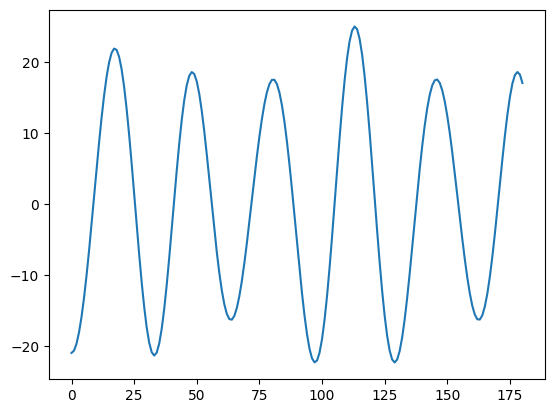

In [14]:
A1 = 20 # amplitud del Seno
A2 = -3 # amplitud primer coseno
A3 = 2 # amplitud segundo coseno

T_1 = (2/7)*np.pi # periodo del seno
T_2 = (2/5)*np.pi # periodo coseno 1
T_3 = (2/10)*np.pi # periodo coseno 2

w1=7 #Omega seno
w2=5 #Omega coseno 1
w3=10 #Omega coseno 2

f1=1/T_1 # Frecuencia seno
f2=1/T_2 # Frecuencia Coseno 1
f3=1/T_3 # Frecuencia Coseno 2

ti = 0 #tiempo inicial
tf = 4*T_2 #tiempo final (4 veces periodo mas lento)
Fs = 36 # Hz (>2 veces fmax para cumplir teorema de nyquist)
Ts = 1/Fs
tv = np.arange(ti,tf,Ts) #vector de datos en tiempo #discretizar
y = A1*np.sin(w1*tv-np.pi/2)+ A2*np.cos(w2*tv)+ A3*np.cos(w3*tv) #Señal original

#cero y pendiente
ymin = -3.3 # Voltaje miimo del ADC
ymax = 5 # Voltaje maximo del ADC
nbits = 5 # Numero de bits
plt.plot(y,label='y(t)')

4. Se llamas las funciones definidas en la paso 2, con el primer ciclo for se acerca el valor de la  funcion al cajon mas cercano y con el segundo cajon se alargan los cajones a lo largo del tiempo, por ultimo se grafica la señal discretizada y cuantizada.

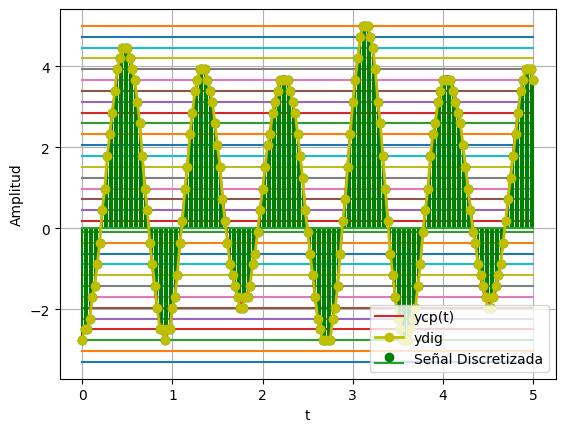

Señal discretizada


In [15]:
ycs = my_ceropen(y, ymin,ymax)#cero y pendiente
ve = np.linspace(ymin,ymax,2**nbits)#Crea los cajones

#Acercar al cajon más cercano
for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

#Anchar los cajones a lo largo de tv
for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))#estados de cuantización

#Graficar la señal
plt.stem(tv,yq , linefmt="green", markerfmt="go", basefmt="", label="Señal Discretizada")
plt.plot(tv,ycs,label='ycp(t)') #discreta cero y pendiente
plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2) #cuantizada + discreta = digital
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()
print("Señal discretizada")

Punto 2:

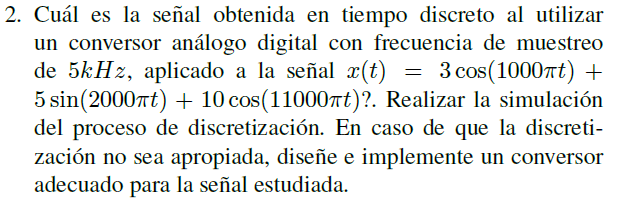

1. En base a las librerias agregadas para el punto anterior se agrega una nueva libreria para desarrollar el ejercicio

In [16]:
from scipy import signal

2. Se agregan los parametros de la señal, se define la señal original, se dieseña un filtro para evitar el aliasing, se le aplica el filtro a la señal continua, se realiza una muestra con la frecuencia dada por el ejercicio.

In [17]:
# Parámetros de la señal
f1 = 500   # Hz
f2 = 1000  # Hz
f3 = 5500  # Hz
fs_high = 100000  # Frecuencia de muestreo alta para simular señal "continua"
t_high = np.arange(0, 0.01, 1/fs_high)  # 0.01 segundos (para mejor visualización)

# Generar la señal original
x_high = (3 * np.cos(2 * np.pi * f1 * t_high) +
          5 * np.sin(2 * np.pi * f2 * t_high) +
          10 * np.cos(2 * np.pi * f3 * t_high))

# Diseñar filtro antialiasing (Butterworth)
nyquist = 0.5 * fs_high
cutoff = 2500  # Frecuencia de corte
order = 6
normal_cutoff = cutoff / nyquist
b, a = signal.butter(order, normal_cutoff, btype='low')

# Aplicar filtro a la señal "continua"
x_filtered = signal.filtfilt(b, a, x_high)

# Muestrear a 5 kHz después del filtro
fs_low = 5000  # 5 kHz
factor = int(fs_high / fs_low)
x_filtered_low = x_filtered[::factor]
t_low = t_high[::factor]

# Calcular FFTs
fft_high = np.fft.rfft(x_high)
freqs_high = np.fft.rfftfreq(len(x_high), 1/fs_high)
fft_filtered = np.fft.rfft(x_filtered_low)
freqs_low = np.fft.rfftfreq(len(x_filtered_low), 1/fs_low)


Se grafican las señales de antes y despues de los filtros

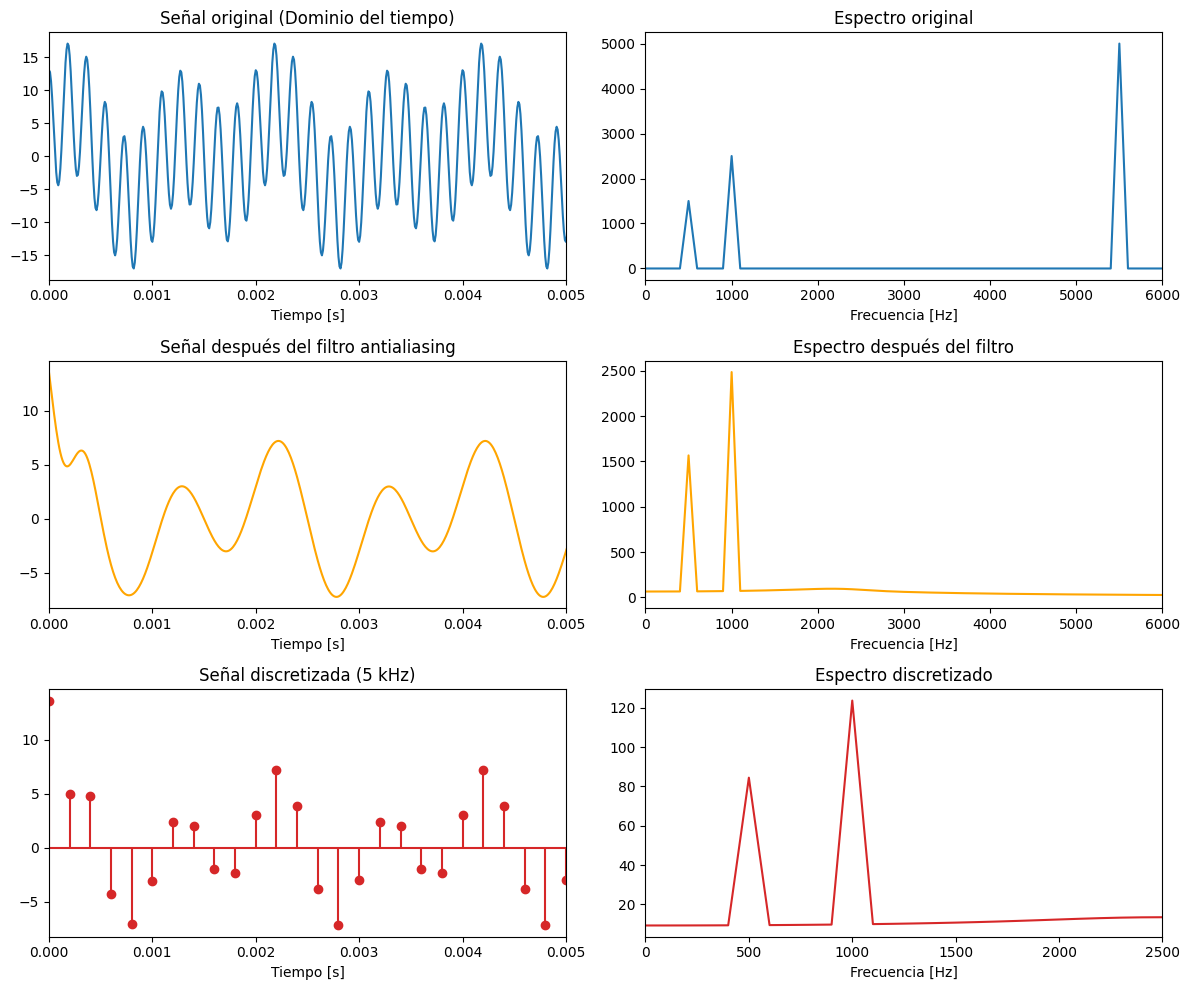


Primeras 10 muestras de la señal discretizada:
[13.6004  4.9941  4.745  -4.2475 -7.0176 -3.0712  2.3571  1.9994 -2.0067
 -2.3295]


In [18]:

# Graficar en tiempo y frecuencia
plt.figure(figsize=(12, 10))

# Señal original en tiempo
plt.subplot(3, 2, 1)
plt.plot(t_high, x_high, label='Original')
plt.title('Señal original (Dominio del tiempo)')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)  # Primeros 5 ms

# Señal original en frecuencia
plt.subplot(3, 2, 2)
plt.plot(freqs_high, np.abs(fft_high))
plt.title('Espectro original')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 6000)

# Señal filtrada en tiempo
plt.subplot(3, 2, 3)
plt.plot(t_high, x_filtered, 'orange', label='Filtrada')
plt.title('Señal después del filtro antialiasing')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)

# Señal filtrada en frecuencia
plt.subplot(3, 2, 4)
plt.plot(freqs_high, np.abs(np.fft.rfft(x_filtered)), color='orange')
plt.title('Espectro después del filtro')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 6000)

# Señal discretizada en tiempo
plt.subplot(3, 2, 5)
plt.stem(t_low, x_filtered_low, linefmt='C3-', markerfmt='C3o', basefmt='C3-')
plt.title('Señal discretizada (5 kHz)')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)

# Señal discretizada en frecuencia
plt.subplot(3, 2, 6)
plt.plot(freqs_low, np.abs(fft_filtered), color='C3')
plt.title('Espectro discretizado')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 2500)

plt.tight_layout()
plt.show()

# Valores de las muestras discretas (primeras 10 muestras)
print("\nPrimeras 10 muestras de la señal discretizada:")
print(np.round(x_filtered_low[:10], 4))

Punto 3)

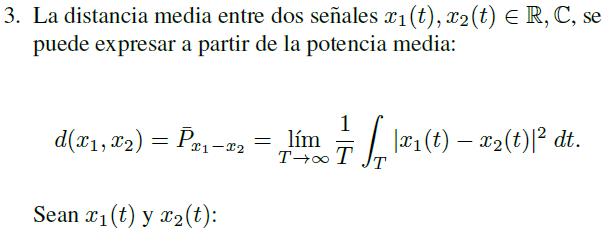
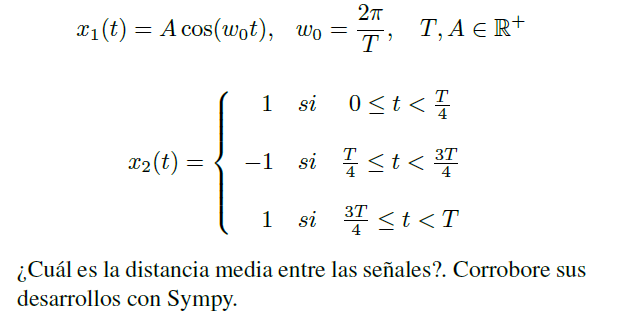

1. Se agrega la libreria sympy para corroborrar el desarrollo como lo pide el ejercicio

In [ ]:
import sympy as sp

Se calcula la diferencia promedio al cuadrado entre dos señales periódicas: una señal coseno (x1) y una señal cuadrada (x2) definida en tramos.

Primero, define x1 como un coseno con periodo T. Luego, define x2 como una señal que vale 1 en los primeros y últimos cuartos del periodo, y -1 en la parte central. Después, calcula la integral de (x1−x2)**2
  en los tres tramos donde x2 cambia de valor, suma los resultados y los divide entre T para obtener el promedio. Finalmente, simplifica la expresión para dar el resultado final, que representa qué tan diferentes son las dos señales en promedio.

In [19]:
# Definición de variables simbólicas
t, T = sp.symbols('t T', real=True, positive=True)
w0 = 2 * sp.pi / T

# Definición de las señales
x1 = sp.cos(w0 * t)
# Definición por partes de x2
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t < T))
)

# Definición de la función a integrar
f = (x1 - x2)**2

# Cálculo de la integral en cada tramo y suma total
integral = sp.integrate(f, (t, 0, T/4)) + sp.integrate(f, (t, T/4, 3*T/4)) + sp.integrate(f, (t, 3*T/4, T))

# Normalización por el periodo
distancia_media = integral / T

# Simplificación del resultado
distancia_media_simplificada = sp.simplify(distancia_media)

distancia_media_simplificada

3/2 - 4/pi

Punto 4)

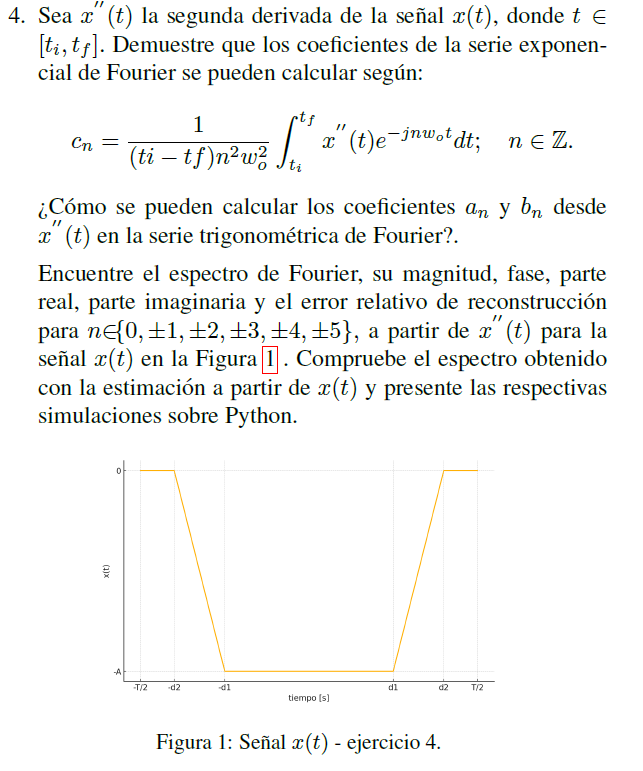

Se importa una nueva libreria necesaria para el desarrollo del problema

In [ ]:
from ipywidgets import interact,IntSlider

Este código genera y grafica una señal trapezoidal simétrica centrada en t=0, definida por parámetros como amplitud (A=1), ancho total (d2=2) y longitud de la meseta (d1=1). Configura el tiempo de visualización (T=4 segundos), la frecuencia de muestreo (Fs=250 Hz) y crea un vector de tiempo desde -2 hasta 2 segundos. La función funcion_trapecio construye la señal con pendientes ascendente y descendente entre [-2,-1] y [1,2], respectivamente, y una meseta plana entre [-1,1]. Finalmente, la gráfica muestra el trapecio en rojo con líneas gruesas, cuadrícula y ejes etiquetados, resultando en un pulso trapezoidal simétrico con transiciones lineales en los bordes.

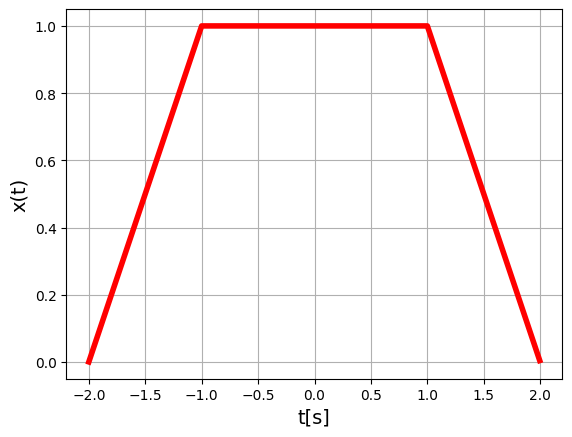

In [20]:
A=1
d2=2
d1=1
#mostrar la señal
T = 2*d2 # segundos de gráfica
Fo = 1/T
Fs = 1000*Fo # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas
def funcion_trapecio(x, a, b, c, d):
    """
    Genera una función en forma de trapecio.

    Parámetros:
    - x: Un array de valores en el eje x.
    - a: Inicio de la pendiente ascendente.
    - b: Inicio de la meseta (valores altos constantes).
    - c: Fin de la meseta (valores altos constantes).
    - d: Fin de la pendiente descendente.

    Retorna:
    - Un array con los valores de la función trapezoidal en cada punto x.
    """
    return np.maximum(0, np.minimum((x - a) / (b - a), np.minimum(1, (d - x) / (d - c))))

# Ejemplo de uso
x = funcion_trapecio(tv, -d2, -d1, d1, d2)



#graficar señal original
plt.plot(tv,x,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

Se calculan los coeficientes de Fourier para aproximar la señal trapezoidal usando 5 armónicos. Primero genera las funciones base necesarias y luego calcula los coeficientes mediante una fórmula matemática que incluye términos coseno, evitando cálculos numéricos complejos. El valor central (componente DC) se fija en 0.75 manualmente. Esto permite reconstruir la señal original sumando estos armónicos seleccionados.



In [21]:
N = 5 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),np.complex128)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,np.complex128)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = (-2*(np.cos(nv*np.pi)-np.cos(nv*np.pi*0.5)))/(np.pi**2*nv**2)
Cn[N] = 3/4 #Nivel DC

<ipython-input-21-8bd570f2a822>:11: RuntimeWarning: invalid value encountered in divide
  Cn = (-2*(np.cos(nv*np.pi)-np.cos(nv*np.pi*0.5)))/(np.pi**2*nv**2)


Por ultimo se realizan las graficas para observar los procesos de la señal

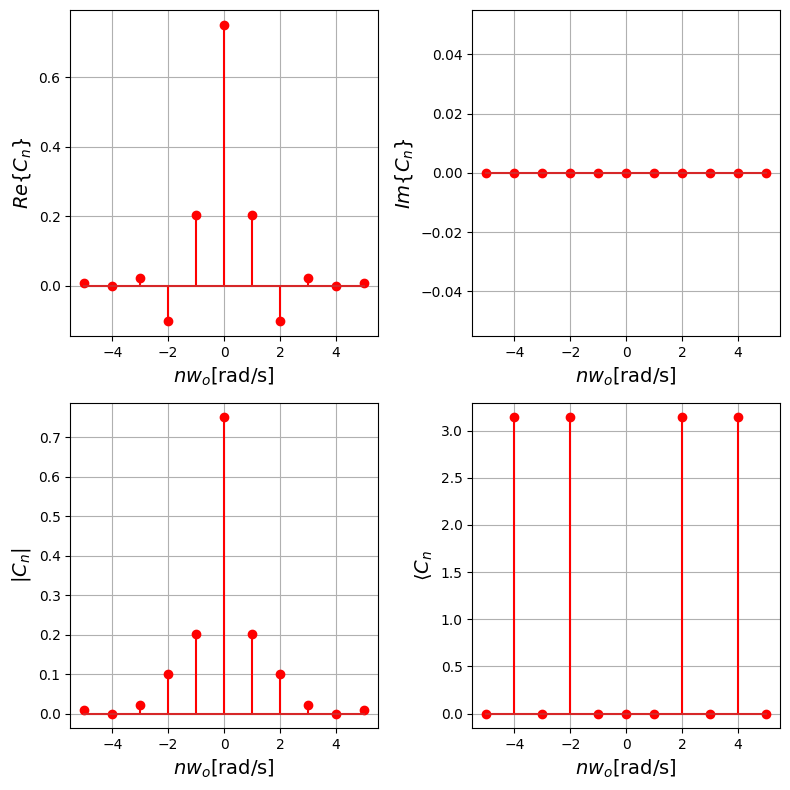

In [22]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

Se compara la señal trapezoidal original (roja) con su reconstrucción usando series de Fourier (azul), variando interactivamente el número de armónicos (Na). Calcula el error de aproximación (Er) y muestra cómo mejora la reconstrucción al incluir más armónicos. La potencia de la señal (Px) se estimó como 2/3, y el error disminuye al aumentar Na. La herramienta interact permite ajustar dinámicamente el número de armónicos usados (de 1 a 5).

In [23]:
Px = 2/3 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] )
    plt.plot(tv,xe,color='b',label='$x_e(t)$')
    plt.plot(tv,x,color='r',label='x(t)')
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=5, min=1), Output()), _dom_classes=('widget-int…

<function __main__.pltest(Na=1)>